<a href="https://colab.research.google.com/github/Nubiancodingdelight/ACS-Project-Repository-/blob/main/Generating_VIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
#mounts google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [55]:
#set path
%cd /content/drive/MyDrive/ACS_Research/VISDB_Data/

/content/drive/MyDrive/ACS_Research/VISDB_Data


In [3]:
!pip install Bio pyfaidx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.0/281.0 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 2.1 MB/s eta 0:00:00


In [56]:
#import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pyfaidx import Fasta

Extract sequence from virus

In [57]:
from Bio import SeqIO
def virus_seq_extract(name, ref, start, stop):
  path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/' +name+ "/"+ ref + ".fasta"
  for record in SeqIO.parse(path, "fasta"):
      extracted_seq = record.seq[start-1:stop]
  return extracted_seq

In [58]:
def virus_seq_extract(name, ref, start, stop):
  path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/' +name+ "/"+ "sequence.fasta"
  virus_gene = Fasta(path)
  extracted_seq = virus_gene[ref][start-1:stop]
  return extracted_seq.seq
 # for record in SeqIO.parse(path, "fasta"):
  #    extracted_seq = record.seq[start-1:stop]
  #return extracted_seq

In [59]:
#testing virus
#print(virus_seq_extract('HBV', 'NC_003977.1',50, 100))

KeyError: 'NC_003977.1 not in /content/drive/MyDrive/ACS_Research/VISDB_Data/Viral_Reference/HBV/sequence.fasta.'

Extract Sequence from Human Reference 100 bp upstream and 100 bp downstream

In [60]:
def human_seq_extract(ref, chr, start, stop):
  seq_list = []
  #hg19 human reference genome
  if ref.lower() in ('grch37/hg19','hg19','grch37'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg19/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start].seq)
      seq_list.append(genes[0][stop:stop+100].seq)
    else:
      seq_list.append(genes[0][start:start+100].seq)
      seq_list.append(genes[0][stop-100:stop].seq)

  #hg38 human reference
  elif ref.lower() in ('hg38'):
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/hg38/uncompressed/' + chr + '.fa'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start])
      seq_list.append(genes[0][stop:stop+100])
    else:
      seq_list.append(genes[0][start:start+100])
      seq_list.append(genes[0][stop-100:stop])

  #All other references
  else:
    #hg38
    path = '/content/drive/MyDrive/ACS_Research/VISDB_Data/Human_Reference/'+ref + '/' + chr + '.fasta'
    genes = Fasta(path)
    if start < stop:
      seq_list.append(genes[0][start-100:start])
      seq_list.append(genes[0][stop:stop+100])
    else:
      seq_list.append(genes[0][start:start+100])
      seq_list.append(genes[0][stop-100:stop])
  return seq_list

In [61]:
#testing
print(human_seq_extract('hg19', 'chr1', 100, 200))

['NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN', 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN']


In [62]:
#testing
print(human_seq_extract('AL360074', 'chr1', 100, 200))

[>AL360074.21:1-100
AAGCATTTTAGGGCGCTACCCTGTTTCTGTAGGGCATATTGACATCCTGAATGCAAGGAAGTCTGGTTAATGCTATTCTCTCAAATACAGGGTTTTGGTG, >AL360074.21:201-300
ATTTACCAGCTTCTGTTGTGGGCCTGTGAATATATTAGGGTGTGATGACAGATGAGGTCTTGTCTTTTGGAAACTTAACAGGATTGTTGGGGGCGGGGAA]


Load Data

In [63]:
#load xslx
vis_df = pd.read_excel('Supplementary Table 1.xlsx')
vis_df.head()

,Virus,Virus subtype,Reference virus genome,Begin breakpoint,Stop breakpoint,Chromosome,Locus,Reference human genome,Begin location,End location,Sample,Disease,Method,PubMed ID,Target gene
0,HBV,NaN,FJ562281.1,1782.0,NaN,chr9,q31.1,GRCh38,100940295.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,CORO2A
1,HBV,NaN,GQ377546.1,1820.0,NaN,chr9,q31.1,GRCh38,101030026.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
2,HBV,NaN,KC792890.1,1471.0,NaN,chr3,p26.3,GRCh38,2002381.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
3,HBV,NaN,FJ622847.1,689.0,NaN,chr2,q35,GRCh38,216281034.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN
4,HBV,NaN,KF166416.1,1807.0,NaN,chr16,q12.1,GRCh38,51320015.0,NaN,Tumor,Hepatocellular carcinoma,PCR and Sanger sequencing,30535432,NaN


Transform Data

In [64]:
def lower_case_and_underscore(df):
  """Lowercases all column names and replaces spaces with underscores."""
  new_columns = [col.lower().replace(' ', '_') for col in df.columns]
  df.columns = new_columns
  return df

In [65]:
vis_df = lower_case_and_underscore(vis_df)



In [66]:
vis = vis_df['reference_virus_genome'].unique()
for item in vis:
  print(f"{item} or ")

FJ562281.1 or 
GQ377546.1 or 
KC792890.1 or 
FJ622847.1 or 
KF166416.1 or 
KF167170.1 or 
GU815714.1 or 
GU815645.1 or 
JN827419.1 or 
JQ688405 or 
JX026886.1 or 
AB713529.1 or 
KC792925.1  or 
JX507212.1 or 
nan or 
U95551.1 or 
X70185.1 or 
AB033556.1 or 
X75657.1 or 
AP011098 or 
 V01460.1 or 
JQ688404 or 
NC_003977 or 
AP011098.1 or 
AF533983.1 or 
AB033550.1 or 
D00329.1 or 
D00330.1 or 
AF043594.1 or 
D00630.1 or 
NC_003977.1 or 
AY800389.1
 or 
AY033073.1 or 
V01460.1 or 
AB241115 or 
X0276 or 
DQ089769.1 or 
V00866 or 
AF068756  or 
AF330110 or 
D50519.1 or 


In [67]:
#filter out rows where begin_breakpoint or stop breakpoint  and also begin and end location are NA

vis_df = vis_df.dropna(subset=['begin_breakpoint', 'stop_breakpoint', 'begin_location', 'end_location', 'reference_virus_genome'], how='any')
vis_df.head()

,virus,virus_subtype,reference_virus_genome,begin_breakpoint,stop_breakpoint,chromosome,locus,reference_human_genome,begin_location,end_location,sample,disease,method,pubmed_id,target_gene
346,HBV,NaN,X70185.1,1720.0,1603.0,chr1,q21.1,GRCh37/hg19,420.0,437.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,ANP32E
347,HBV,NaN,X70185.1,1246.0,1390.0,chr1,p21.3,GRCh37/hg19,97732036.0,97732056.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,DPYD
348,HBV,NaN,X70185.1,1603.0,1664.0,chr1,q31.3,GRCh37/hg19,194161891.0,194161910.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,NaN
349,HBV,NaN,X70185.1,1623.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B
350,HBV,NaN,X70185.1,1638.0,1717.0,chr2,q31.1,GRCh37/hg19,171450967.0,171450816.0,cell,Hepatocellular carcinoma,invPCR+NAH,28414318,MYO3B


In [68]:
# Filter for 'GRCh37/hg19', 'hg19', or 'GRCh37' in the 'reference_human_genome' column (case-insensitive)
vis_df = vis_df[vis_df['reference_human_genome'].str.lower().isin(['grch37/hg19', 'hg19', 'grch37'])]
vis_df['reference_human_genome'].unique()


array(['GRCh37/hg19', 'GRCh37'], dtype=object)

Data Visualization to Characterize Data

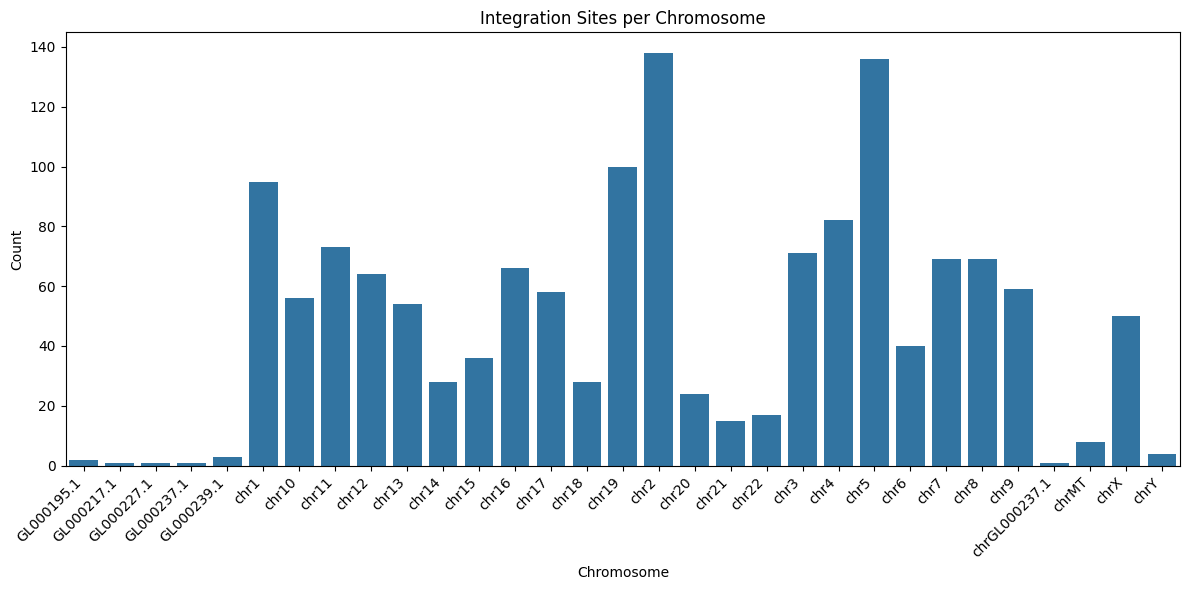

In [69]:
# prompt: make a graph by chromosome and count order by sequentially from low to high]

# Count occurrences of each chromosome
chromosome_counts = vis_df['chromosome'].value_counts().sort_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=chromosome_counts.index, y=chromosome_counts.values)
plt.xlabel('Chromosome')
plt.ylabel('Count')
plt.title('Integration Sites per Chromosome')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


Concatenate Viral and Human Sequence and Insert into

In [85]:
#loop through data
seq_list =[]
for ind, row in vis_df.iterrows():
    try:
      virus_name = row['virus']
      virus_ref = row['reference_virus_genome']
      hum_ref = row['reference_human_genome']
      chrom = row['chromosome']
      begin_ref = int(row['begin_location'])
      stop_ref = int(row['end_location'])
      human_seq = human_seq_extract(hum_ref, chrom, begin_ref, stop_ref )
      viral_seq = virus_seq_extract(virus_name, virus_ref, int(row['begin_breakpoint']), int(row['stop_breakpoint']))
      spliced_seq = human_seq[0] + viral_seq + human_seq[1]
      seq_list.append([virus_name, virus_ref, hum_ref, spliced_seq, viral_seq, human_seq[0], human_seq[1]])
      #print(ind)
    except:
      print(f"Virus Name:{virus_name}  Virus Reference: {virus_ref} \n Human Reference: {hum_ref} , Chromosome: {chrom} , Begin Location:{begin_ref} , End Location:{stop_ref} ")
      pass




Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr19 , Begin Location:30304176 , End Location:30304305 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr2 , Begin Location:216294237 , End Location:216294353 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr2 , Begin Location:216296825 , End Location:216297478 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr19 , Begin Location:30303492 , End Location:30303328 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr19 , Begin Location:30303512 , End Location:30304153 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr3 , Begin Location:196625657 , End Location:196625755 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37/hg19 , Chromosome: chr2 , Begin Location:216280307 , End L

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chr9 , Begin Location:139013592 , End Location:139013627 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chr9 , Begin Location:139781668 , End Location:139781703 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:8932 , End Location:9044 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrX , Begin Location:28069267 , End Location:28069302 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrX , Begin Location:37782054 , End Location:37782089 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrX , Begin Location:38319711 , End Location:38319746 
Virus Name:HBV  Virus Reference: NC_003977 
 Human Reference: GRCh37 , Chromosome: chrX , Begin Location:63104641 , End Location:63104676 
Virus Name:HBV  Virus Referenc

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr16 , Begin Location:22743309 , End Location:22744359 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr16 , Begin Location:31401858 , End Location:31402908 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:1268108 , End Location:1269156 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:1273247 , End Location:1274295 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:1273247 , End Location:1274295 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr1 , Begin Location:178593657 , End Location:178594705 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:1270683 , End Location:1271731 
Virus Name:HBV  V

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr17 , Begin Location:19463195 , End Location:19464243 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr17 , Begin Location:8566663 , End Location:8567711 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr17 , Begin Location:8566634 , End Location:8567682 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr12 , Begin Location:22474706 , End Location:22475754 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr22 , Begin Location:36633255 , End Location:36634303 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr14 , Begin Location:82696004 , End Location:82697052 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000195.1 , Begin Location:48483 , End Location:49531 
Virus Name:

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr22 , Begin Location:50744519 , End Location:50745567 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr9 , Begin Location:9595 , End Location:10643 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr18 , Begin Location:9522 , End Location:10570 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr1 , Begin Location:249239959 , End Location:249241007 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000227.1 , Begin Location:73446 , End Location:74494 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr10 , Begin Location:135524090 , End Location:135525138 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr17 , Begin Location:81194522 , End Location:81195570 
Virus Name:HBV  Vir

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr19 , Begin Location:36213523 , End Location:36214573 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr8 , Begin Location:26696986 , End Location:26698034 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr1 , Begin Location:207105269 , End Location:207106317 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:118824339 , End Location:118825387 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:11350 , End Location:12398 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrMT , Begin Location:8431 , End Location:9479 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr12 , Begin Location:49076838 , End Location:49077886 
Virus Name:HBV  Vir

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr2 , Begin Location:128214516 , End Location:128215564 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr9 , Begin Location:127170379 , End Location:127171427 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr12 , Begin Location:63780636 , End Location:63781684 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr9 , Begin Location:119868787 , End Location:119869835 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrX , Begin Location:86419701 , End Location:86420749 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr6 , Begin Location:137976591 , End Location:137977639 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr13 , Begin Location:22336765 , End Location:22337813 
Vir

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr5 , Begin Location:79114695 , End Location:79115743 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000237.1 , Begin Location:32834 , End Location:33882 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14424 , End Location:15472 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr6 , Begin Location:108775407 , End Location:108776455 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:24880961 , End Location:24882009 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr21 , Begin Location:11129349 , End Location:11130397 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr21 , Begin Location:11129578 , End Location:11130626 


Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'
Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
 

Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr1 , Begin Location:8332260 , End Location:8333308 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:5786789 , End Location:5787837 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chrGL000237.1 , Begin Location:33183 , End Location:34231 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14877 , End Location:15925 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr10 , Begin Location:127204203 , End Location:127205251 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: GL000239.1 , Begin Location:14320 , End Location:15368 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr22 , Begin Location:38601713 , End Location:38602761 
Virus Name

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:10697196 , End Location:10698244 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:10691234 , End Location:10692282 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr6 , Begin Location:165931870 , End Location:165932918 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:47716277 , End Location:47717325 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr12 , Begin Location:76691019 , End Location:76692067 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr7 , Begin Location:27670821 , End Location:27671869 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr10 , Begin Location:31482850 , End Location:31483898 
Virus Nam

Exception ignored in: <function Faidx.__del__ at 0x78096455ea20>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 883, in __del__
    self.__exit__()
  File "/usr/local/lib/python3.11/dist-packages/pyfaidx/__init__.py", line 889, in __exit__
    self.file.close()
    ^^^^^^^^^
AttributeError: 'Faidx' object has no attribute 'file'


Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr19 , Begin Location:39796619 , End Location:39797667 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr11 , Begin Location:91208490 , End Location:91209538 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr17 , Begin Location:25282916 , End Location:25283964 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr18 , Begin Location:15203803 , End Location:15204851 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr16 , Begin Location:33845806 , End Location:33846854 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr18 , Begin Location:15203868 , End Location:15204916 
Virus Name:HBV  Virus Reference: NC_003977.1 
 Human Reference: GRCh37 , Chromosome: chr21 , Begin Location:9476706 , End Location:9477754 
Virus Na

In [81]:
%ls

 Human_Reference/   Spliced_Data.gsheet           Viral_Reference/
 Spliced_Data.csv  'Supplementary Table 1.xlsx'


In [86]:
#make seq_list a dataframe save as a csv
seq_df = pd.DataFrame(seq_list, columns=['virus', 'virus_ref', 'human_ref', 'spliced_seq', 'viral_seq', 'human_seq_upstream', 'human_seq_downstream'])
seq_df.to_csv('Spliced_Data.csv')
